In [450]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd
from matplotlib import pyplot
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
# Librerias para graficar
# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

!ls
%mkdir data
!ls

data  drive  sample_data
mkdir: cannot create directory ‘data’: File exists
data  drive  sample_data


In [451]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [452]:
import shutil
shutil.copy("/content/drive/MyDrive/sis_420/Labs/Lab_03/exams.csv","/content/data/exams.csv")


'/content/data/exams.csv'

In [453]:
#  LAB 03, 9/09/23
#  https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics
##

# Cargar datos
data = pd.read_csv( os.path.join('data', 'exams.csv') )
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [454]:
columnas_categoricas = data.select_dtypes(include=['object']).columns
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

# ordenamos las columnas
col = data.pop("test preparation course")
data.insert(len(data.columns), "test preparation course", col)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   math score                   1000 non-null   int64
 5   reading score                1000 non-null   int64
 6   writing score                1000 non-null   int64
 7   test preparation course      1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


In [455]:
first_80_percent = int(0.8 * len(data))

train = data[:first_80_percent]
test  = data[first_80_percent:]

# train.info()
X = train.iloc[:, :7].values
y = train.iloc[:, 7].values

row_test = [0, 3, 4, 1, 0, 59, 70, 78]
print(X)
print(y)

[[ 0  3  4 ... 59 70 78]
 [ 1  3  0 ... 96 93 87]
 [ 0  3  4 ... 57 76 77]
 ...
 [ 0  3  4 ... 81 93 94]
 [ 0  1  0 ... 61 64 63]
 [ 1  1  2 ... 51 52 46]]
[0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0
 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0
 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0
 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0
 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1
 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 0 1 1 0 1 1 

In [456]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


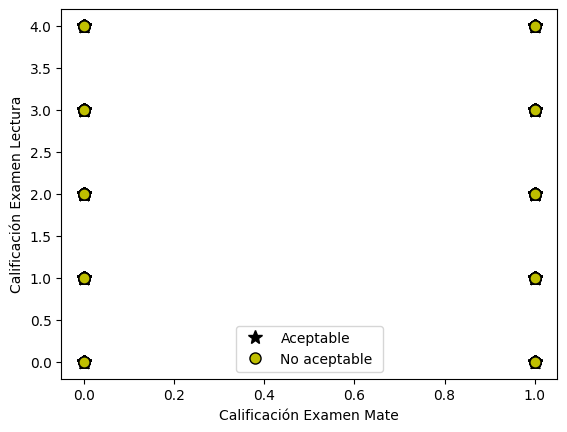

In [457]:
plotData(X, y)
# adiciona etiquetas para los ejes
pyplot.xlabel('Calificación Examen Mate')
pyplot.ylabel('Calificación Examen Lectura')
pyplot.legend(['Aceptable', 'No aceptable '])
pass

In [458]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g

In [459]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)
print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [460]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X[5])

[ 1.  1.  2.  5.  1. 68. 57. 54.]


In [461]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

In [462]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 0.08058169 -0.10583084  0.05870053  0.03034704  0.10590115  0.04515925
  0.15708851 -0.19868291]
Un estudiante con nota de matematicas: 59, lectura: 70, escritura: 78 (usando el descenso por el gradiente): 0.13135644470477773 



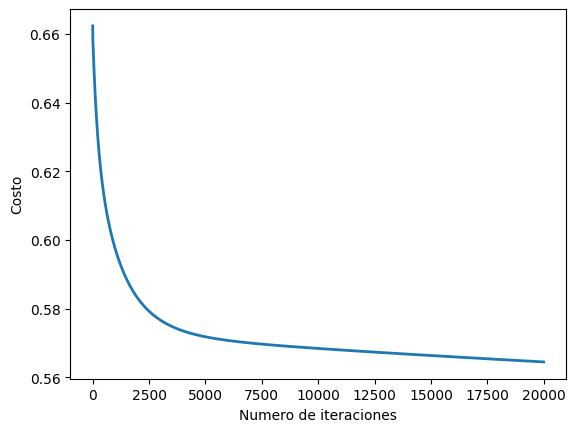

In [463]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0002
num_iters = 20000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar el redimiento del un estudiante
X_array = row_test.copy()
aprueba = sigmoid(np.dot(X_array, theta))

print(f"Un estudiante con nota de matematicas: {X_array[5]}, lectura: {X_array[6]}, escritura: {X_array[7]} (usando el descenso por el gradiente): {aprueba} \n")


In [464]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta.T)) #hipotesis
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [465]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))

print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}]'.format(*grad))



[0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
[-0.15125  -0.085    -0.3125   -0.378125 -0.12375  -9.42875  -9.239375
 -8.26625 ]
Gradiente en theta inicial (zeros):
	[-0.151, -0.085, -0.312,-0.378, -0.124, -9.429,-9.239, -8.266]


In [466]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array( [-0.6, -0.2, -0.1, -0.3, -3, -2, -1, -2 ] )

#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}]'.format(*grad))

[-0.6 -0.2 -0.1 -0.3 -3.  -2.  -1.  -2. ]
Costo en theta prueba: 218.499
Gradiente en theta prueba:
	[-0.651, -0.335, -1.397,-1.650, -0.448, -43.079,-44.339, -42.784]


In [467]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

res = optimize.minimize(costFunction, initial_theta, (X, y), jac=True, method='TNC', options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`

cost = res.fun # contiene el valor de costo
theta = res.x # Theta optimizada esta en la propiedad x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print(theta)
print('\t[{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f} ]'.format(*theta))

Costo con un valor de theta encontrado por optimize.minimize: 0.486
theta:
[ 5.49533717 -2.23754558  0.01936608 -0.10354852  0.6366834   0.11587535
  0.13511346 -0.30357086]
	[5.495, -2.238, 0.019,-0.104, 0.637, 0.116,0.135, -0.304 ]


<ipython-input-467-8a51a25fc699>:4: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction, initial_theta, (X, y), jac=True, method='TNC', options=options)


In [468]:
# verificar si ingresa o no a la universidad
X_array = row_test.copy()
theta_om =[-2.33537208, -1.30567305, -0.24192603,  0.11717747,  0.43046607,  0.13982024, -0.05113825, -0.03059966]
aprueba = sigmoid(np.dot(X_array, theta_om))

print(f"Un estudiante con nota de matematicas: {X_array[5]}, lectura: {X_array[6]}, escritura: {X_array[7]} (usando el descenso por el gradiente): {aprueba} \n")


Un estudiante con nota de matematicas: 59, lectura: 70, escritura: 78 (usando el descenso por el gradiente): 0.07694466761401868 



In [469]:
#
# def plotDecisionBoundary(plotData, theta, X, y):
#     """
#     Grafica los puntos X y Y en una nueva figura con un limite de desicion definido por theta.
#     the data points X and y into a new figure with the decision boundary defined by theta.
#     Grafica los puntos con * para los ejemplos positivos y con o para los ejemplos negativos.

#     Parametros:
#     ----------
#     plotData : func
#         A function reference for plotting the X, y data.

#     theta : array_like
#         Parametros para la regresion logistica. Un vecto de la forma (n+1, ).

#     X : array_like
#         Data set de entrada. Se supone que X es una de las siguientes:
#             1) Matriz Mx3, donde la primera columna es una columna de unos para intercepción.
#             2) Matriz MxN, N> 3, donde la primera columna son todos unos.

#     y : array_like
#         Vector de datos de etiquetas de la forma (m, ).
#     """
#     # hacer que theta sera un arreglo numpy
#     theta = np.array(theta)

#     # Graficar los datos (recordar que la primera columna en X es la intercepción)
#     plotData(X[:, 1:3], y)

#     if X.shape[1] <= 3:
#         # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
#         plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

#         # Calcular la línea límite de decisión
#         plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

#         print(plot_x)
#         print(plot_y)
#         # Graficar y ajustar los ejes para una mejor visualización
#         pyplot.plot(plot_x, plot_y)

#         # Leyenda, especifica para el ejercicio
#         pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
#         pyplot.xlim([30, 100])
#         pyplot.ylim([30, 100])
#     else:
#         # Rango de la grilla
#         u = np.linspace(-1, 1.5, 50)
#         v = np.linspace(-1, 1.5, 50)

#         z = np.zeros((u.size, v.size))
#         # Evalua z = theta*x sobre la grilla
#         for i, ui in enumerate(u):
#             for j, vj in enumerate(v):
#                 z[i, j] = np.dot(mapFeature(ui, vj), theta)

#         z = z.T  # importante transponer z antes de llamar al contorno
#         # print(z)

#         # Plot z = 0
#         pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
#         pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)


In [470]:
# Graficar limites
# plotDecisionBoundary(plotData, theta, X, y)

In [471]:
def predict(theta, X):
    m = X.shape[0] # Numero de ejemplo de entrenamiento
    p = np.zeros(m)
    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [472]:

prob = sigmoid(np.dot([1, 0, 1, 1, 60, 69, 76, 1], theta))
print('Se predice una probabilidad rendimiento aceptable: {:.3f}%'.format(prob))

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))

Se predice una probabilidad rendimiento aceptable: 1.000%
Precisión de entrenamiento: 76.25 %
